## Does the air pollution of a country have a direct influence on the annual average temperature?

### 1. Business Understanding:
We all know that air pollution is a factor in climate change. What we also know is that this is a global problem. But could it also be that the emissions of a country could already have a direct influence on the annual average temperature of that country? 
With data from the Community Emissions Data System (CEDS) and temperature data from FAOSTAT Temperature Change, this statement will be verified within a CRISP-DM analysis.

<cite>CEDS: https://github.com/JGCRI/CEDS</cite>

<cite>FAOSTAT: https://www.fao.org/faostat</cite>

<cite>Data Sources</cite>

<cite>CEDS-Data: https://ourworldindata.org/explorers/air-pollution</cite>

<cite>FAOSTAT-Temperature-Data: https://www.fao.org/faostat/en/#data/ET</cite>

### 2. Data Understanding

In [1]:
# basic imports
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn
import pandas as pd

# base path
base_path = "/home/ldcgrj0/DEV/Demos/ppyds/ppyds_project/data"

#### 2.1 Data Understanding - Emmisions data (CEDS)

In [2]:
# load emmisions data
df_emmisions =  pd.read_csv(base_path+"/air-pollution_2019.csv", sep=',') 

In [3]:
df_emmisions.sample(5)

Nitrogen oxide (NOx)  Sulphur dioxide (SO₂)  Carbon monoxide (CO)  \
4210           3.616127e+05           1.792146e+05          9.220999e+05   
8710           2.523684e+07           1.925530e+07          1.706496e+08   
4883           2.603418e+03           1.890971e+03          1.278590e+04   
23358          3.151301e+02           1.083973e+02          6.279140e+04   
20654          6.874351e+04           1.046779e+05          2.609076e+06   

       Organic carbon (OC)        NMVOCs  Black carbon (BC)  Ammonia (NH₃)  \
4210          9.297260e+03  2.113317e+05       8.519689e+03   1.034784e+05   
8710          2.055973e+06  2.990376e+07       1.326455e+06   1.237515e+07   
4883          7.381850e+02  1.383900e+04       1.963561e+02   8.828859e+03   
23358         2.585963e+03  6.443893e+03       6.925068e+02   2.815796e+03   
20654         4.980296e+04  2.960612e+05       9.396089e+03   1.834629e+05   

        Entity  Year  
4210   Belgium  2000  
8710     China  2015  
4883    Bhutan  1928  
23358  Lesotho  1918  
20654    Italy  1909

In [4]:
df_emmisions.info()
print("shape:", df_emmisions.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47535 entries, 0 to 47534
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Nitrogen oxide (NOx)   47535 non-null  float64
 1   Sulphur dioxide (SO₂)  47535 non-null  float64
 2   Carbon monoxide (CO)   47535 non-null  float64
 3   Organic carbon (OC)    47535 non-null  float64
 4   NMVOCs                 47535 non-null  float64
 5   Black carbon (BC)      47535 non-null  float64
 6   Ammonia (NH₃)          47535 non-null  float64
 7   Entity                 47535 non-null  object 
 8   Year                   47535 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 3.3+ MB
shape: (47535, 9)


In [5]:
df_emmisions.describe()

Nitrogen oxide (NOx)  Sulphur dioxide (SO₂)  Carbon monoxide (CO)  \
count          4.753500e+04           4.753500e+04          4.753500e+04   
mean           5.260436e+05           7.992584e+05          5.173733e+06   
std            4.332972e+06           5.743331e+06          3.059404e+07   
min            0.000000e+00           0.000000e+00          0.000000e+00   
25%            1.548467e+02           6.235476e+01          1.469565e+04   
50%            1.689596e+03           8.450006e+02          1.163538e+05   
75%            2.899340e+04           3.199098e+04          6.540220e+05   
max            1.095663e+08           1.335263e+08          6.616236e+08   

       Organic carbon (OC)        NMVOCs  Black carbon (BC)  Ammonia (NH₃)  \
count         4.753500e+04  4.753500e+04       4.753500e+04   4.753500e+04   
mean          1.302651e+05  8.868047e+05       4.678637e+04   3.417240e+05   
std           6.744725e+05  5.927514e+06       2.771701e+05   2.250404e+06   
min           0.000000e+00  0.000000e+00       0.000000e+00   0.000000e+00   
25%           6.073753e+02  2.245105e+03       1.514704e+02   1.399557e+03   
50%           4.364754e+03  1.728262e+04       1.065555e+03   9.817929e+03   
75%           2.160645e+04  1.139918e+05       6.333218e+03   5.276752e+04   
max           1.401013e+07  1.468331e+08       6.314146e+06   6.142059e+07   

               Year  
count  47535.000000  
mean    1909.436731  
std       66.777467  
min     1750.000000  
25%     1853.000000  
50%     1912.000000  
75%     1968.000000  
max     2019.000000

1. Nitrogen oxides (NOx) - gases consisting of nitrogen and oxygen, cause smog and acid rain, are emitted by vehicles and industrial processes.

2. Sulphur dioxide (SO2) - a colourless gas, causes acid rain, emitted from burning fossil fuels, especially coal.

3. Carbon monoxide (CO) - a colourless and odourless gas, toxic to humans, emitted from vehicles and the incomplete combustion of fossil fuels.

4. Organic carbon (OC) - a form of carbon, major component of particulate matter, emitted from vehicles and industrial processes.

5. NMVOCs (Non-Methane Volatile Organic Compounds) - a group of organic gases that contribute to the formation of smog and particulate matter and are emitted by industrial processes, vehicles and solvents.

6. Black carbon (BC) - a type of particulate matter composed mainly of carbon and produced by the incomplete combustion of fossil fuels, biofuels and biomass.

7. Ammonia (NH3) - colourless, strong-smelling gas that contributes to particulate matter and acid rain and is released by agricultural activities, especially livestock and fertilisers, industry and waste management.

<cite>(Hoesly et al, Historical (1750–2014) anthropogenic emissions of reactive gases and aerosols from the Community Emissions Data System (CEDS). Geosci. Model Dev. 11, 369-408, 2018a.)</cite>

<AxesSubplot:>

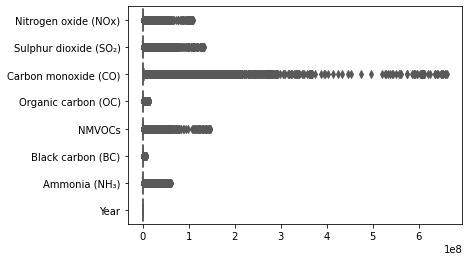

In [6]:
sn.boxplot(data=df_emmisions, orient="h", palette="Set2")

In [7]:
from scipy.stats import zscore

In [8]:
def abs_zscore(x):
    return np.abs(zscore(x))

df_numeric = df_emmisions.select_dtypes(include=np.number)

df_zscore = df_numeric.apply(abs_zscore)

df_zscore.head()

Nitrogen oxide (NOx)  Sulphur dioxide (SO₂)  Carbon monoxide (CO)  \
0              0.121278               0.139140              0.164467   
1              0.121273               0.139139              0.164278   
2              0.121267               0.139138              0.164082   
3              0.121261               0.139137              0.163878   
4              0.121255               0.139136              0.163666   

   Organic carbon (OC)    NMVOCs  Black carbon (BC)  Ammonia (NH₃)      Year  
0             0.185048  0.147364           0.162910       0.148462  2.387608  
1             0.184718  0.147273           0.162670       0.148321  2.237855  
2             0.184376  0.147178           0.162421       0.148174  2.088103  
3             0.184021  0.147079           0.162162       0.148021  1.938350  
4             0.183652  0.146977           0.161894       0.147861  1.788597

In [9]:
threshold = 5
outliers = df_emmisions[(df_zscore>threshold).any(axis='columns')]
none_outliers = df_emmisions[~(df_zscore>threshold).any(axis='columns')]



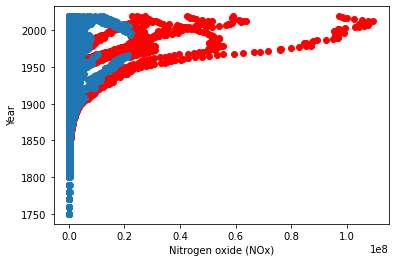

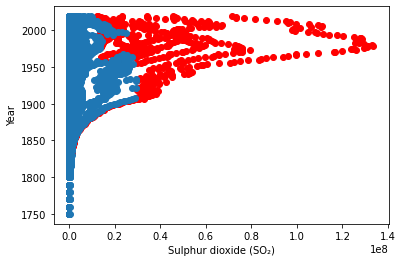

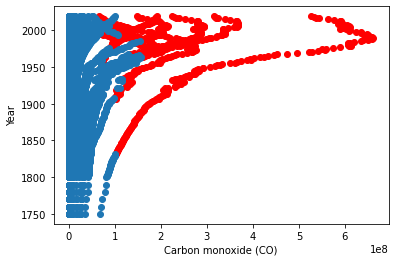

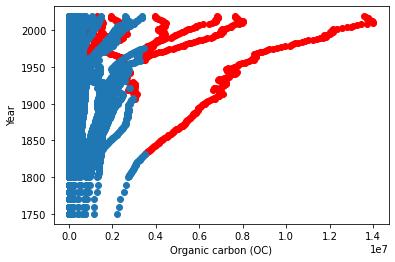

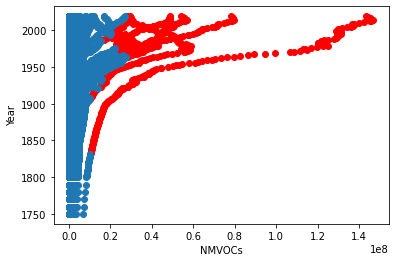

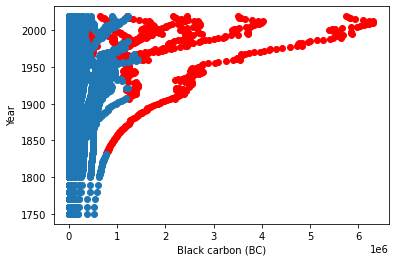

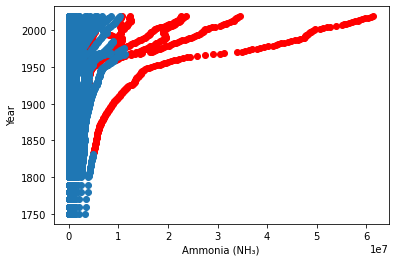

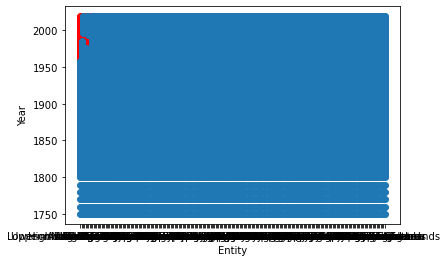

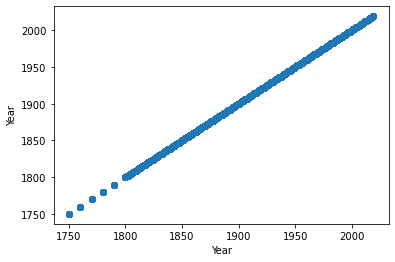

In [10]:
def plot_outliers(outliers, none_outliers):
    # scatter plot example
    for column in outliers.columns:
        plt.figure()
        plt.scatter(outliers[column], outliers['Year'], color='red')
        plt.scatter(none_outliers[column], none_outliers['Year'])
        plt.ylabel('Year')
        plt.xlabel(column)
        plt.show()

plot_outliers(outliers, none_outliers)

In [11]:
outliers[['Carbon monoxide (CO)', 'Year', 'Entity']]

Carbon monoxide (CO)  Year Entity
2144           1.229854e+08  1959   Asia
2145           1.281983e+08  1960   Asia
2146           1.262865e+08  1961   Asia
2147           1.279873e+08  1962   Asia
2148           1.323177e+08  1963   Asia
...                     ...   ...    ...
46855          5.621606e+08  2015  World
46856          5.442772e+08  2016  World
46857          5.373715e+08  2017  World
46858          5.321118e+08  2018  World
46859          5.272669e+08  2019  World

[595 rows x 3 columns]

As we can see, the dataset also contains calculations for complete continents and grouped countries.

We only want to research on a country level. Thats why these values can be removed.

In [12]:
none_countries = ['Asia', 'Africa', 'Europe', 'High-income countries',
       'Lower-middle-income countries', 'North America', 'Sout America',
       'Upper-middle-income countries', 'World']

outliers = outliers[~outliers['Entity'].isin(none_countries)]
outliers

Nitrogen oxide (NOx)  Sulphur dioxide (SO₂)  Carbon monoxide (CO)  \
8681           7.050573e+06           1.512895e+07          1.585073e+08   
8682           7.640982e+06           1.619123e+07          1.639173e+08   
8683           8.240573e+06           1.730994e+07          1.700662e+08   
8684           8.685090e+06           1.746703e+07          1.718056e+08   
8685           9.274450e+06           1.778692e+07          1.725455e+08   
...                     ...                    ...                   ...   
45004          2.360663e+07           2.164014e+07          1.329152e+08   
45005          2.279384e+07           2.112305e+07          1.209242e+08   
45006          2.240060e+07           2.044462e+07          1.196289e+08   
45007          2.253046e+07           2.005812e+07          1.146700e+08   
45008          2.232788e+07           1.973355e+07          1.063980e+08   

       Organic carbon (OC)        NMVOCs  Black carbon (BC)  Ammonia (NH₃)  \
8681          2.276813e+06  1.616427e+07       1.284885e+06   9.099224e+06   
8682          2.333691e+06  1.678429e+07       1.339916e+06   9.284610e+06   
8683          2.397181e+06  1.746100e+07       1.385522e+06   9.466289e+06   
8684          2.427829e+06  1.786567e+07       1.423383e+06   9.640571e+06   
8685          2.469358e+06  1.818165e+07       1.491346e+06   9.814877e+06   
...                    ...           ...                ...            ...   
45004         8.674390e+05  2.238529e+07       3.534719e+05   2.992791e+06   
45005         6.443125e+05  2.076301e+07       3.392239e+05   2.988704e+06   
45006         6.830952e+05  2.089455e+07       3.211741e+05   3.033203e+06   
45007         7.086933e+05  2.060301e+07       3.047036e+05   3.076504e+06   
45008         5.418221e+05  1.987115e+07       2.864951e+05   3.129358e+06   

              Entity  Year  
8681           China  1986  
8682           China  1987  
8683           China  1988  
8684           China  1989  
8685           China  1990  
...              ...   ...  
45004  United States  1989  
45005  United States  1990  
45006  United States  1991  
45007  United States  1992  
45008  United States  1993  

[61 rows x 9 columns]

In [13]:
import plotly.express as px
px.choropleth(data_frame=df_emmisions[~df_emmisions['Entity'].isin(none_countries)], locationmode='country names', locations='Entity', color='Carbon monoxide (CO)', animation_frame='Year', title='Carbon emission by country and year',color_continuous_scale=px.colors.sequential.Plasma, range_color=(100, 0))

<AxesSubplot:title={'center':'Emissions in the USA'}, xlabel='Year'>

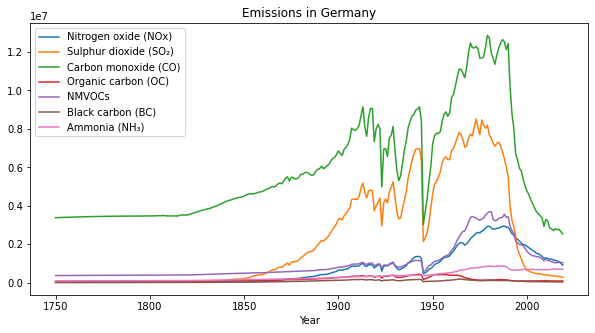

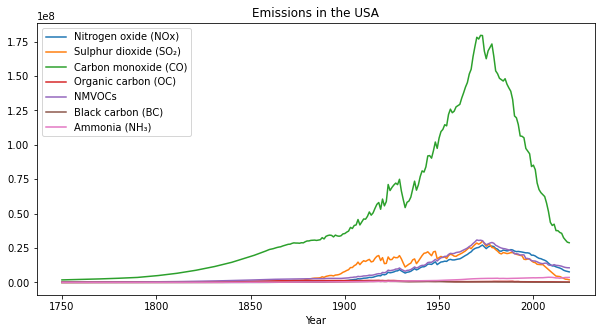

In [14]:
df_emmisions[df_emmisions['Entity']=='Germany'].plot(x='Year', figsize=(10, 5), title='Emissions in Germany')
df_emmisions[df_emmisions['Entity']=='United States'].plot(x='Year', figsize=(10, 5), title='Emissions in the USA')

#### 2.2 Data Understanding - Temperature data (FAOSTAT)

In [15]:
# load emmisions data
df_temperature =  pd.read_csv(base_path+"/temperature_data_2019.csv", sep=',') 

In [16]:
df_temperature.sample(5)

Domain Code              Domain  Area Code (M49)  \
439            ET  Temperature change               16   
10456          ET  Temperature change              308   
1332           ET  Temperature change              533   
2394           ET  Temperature change               84   
22936          ET  Temperature change              239   

                                               Area  Element Code  \
439                                  American Samoa          6078   
10456                                       Grenada          6078   
1332                                          Aruba          7271   
2394                                         Belize          7271   
22936  South Georgia and the South Sandwich Islands          6078   

                  Element  Months Code               Months  Year Code  Year  \
439    Standard Deviation         7020  Meteorological year       1973  1973   
10456  Standard Deviation         7020  Meteorological year       1996  1996   
1332   Temperature change         7020  Meteorological year       2013  2013   
2394   Temperature change         7020  Meteorological year       1979  1979   
22936  Standard Deviation         7020  Meteorological year       1966  1966   

      Unit  Value Flag Flag Description  
439     °C  0.244    E  Estimated value  
10456   °C  0.245    E  Estimated value  
1332    °C  1.017    E  Estimated value  
2394    °C  0.545    E  Estimated value  
22936   °C  0.341    E  Estimated value

In [17]:
df_temperature.info()
print("shape:", df_temperature.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27528 entries, 0 to 27527
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       27528 non-null  object 
 1   Domain            27528 non-null  object 
 2   Area Code (M49)   27528 non-null  int64  
 3   Area              27528 non-null  object 
 4   Element Code      27528 non-null  int64  
 5   Element           27528 non-null  object 
 6   Months Code       27528 non-null  int64  
 7   Months            27528 non-null  object 
 8   Year Code         27528 non-null  int64  
 9   Year              27528 non-null  int64  
 10  Unit              27528 non-null  object 
 11  Value             25416 non-null  float64
 12  Flag              27528 non-null  object 
 13  Flag Description  27528 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 2.9+ MB
shape: (27528, 14)


In [18]:
def temperature_df_preperation(df):
    df = df.drop(df[df_temperature.Element == "Standard Deviation"].index)
    df = df.rename(columns={'Value': 'Temperature Change'})
    df = df.dropna()
    return df 

df_temperature = temperature_df_preperation(df_temperature)
df_temperature.describe()

Area Code (M49)  Element Code  Months Code     Year Code          Year  \
count     13248.000000       13248.0      13248.0  13248.000000  13248.000000   
mean        431.057971        7271.0       7020.0   1991.593825   1991.593825   
std         254.065445           0.0          0.0     17.606610     17.606610   
min           4.000000        7271.0       7020.0   1961.000000   1961.000000   
25%         212.000000        7271.0       7020.0   1976.000000   1976.000000   
50%         426.000000        7271.0       7020.0   1992.000000   1992.000000   
75%         654.000000        7271.0       7020.0   2007.000000   2007.000000   
max         894.000000        7271.0       7020.0   2021.000000   2021.000000   

       Temperature Change  
count        13248.000000  
mean             0.505521  
std              0.648806  
min             -3.251000  
25%              0.047750  
50%              0.436000  
75%              0.901000  
max              5.327000

<AxesSubplot:title={'center':'Temperature in Germany'}, xlabel='Year'>

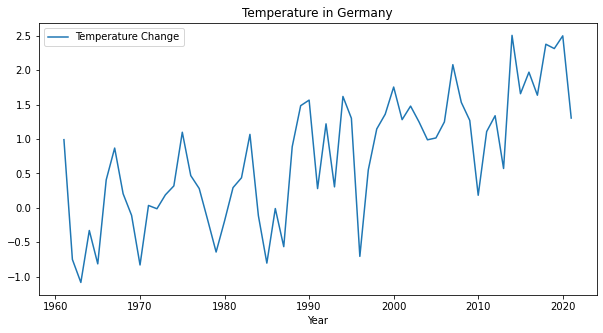

In [19]:
df_temperature[df_temperature['Area']=='Germany'].plot(x='Year', y="Temperature Change", figsize=(10, 5), title='Temperature in Germany')

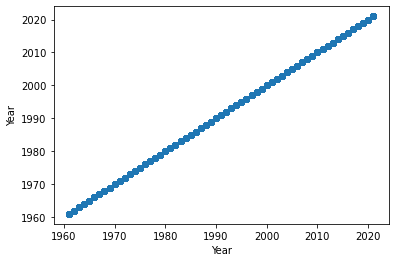

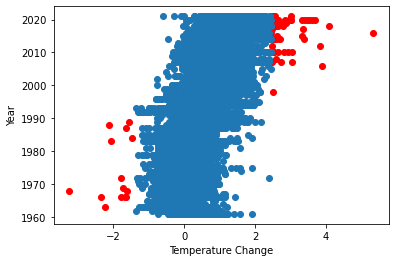

In [20]:
df_temperature_numeric_only = df_temperature.select_dtypes(include=np.number)

df_temperature_zscore = df_temperature_numeric_only.apply(abs_zscore)
threshold = 3
outliers_temperature = df_temperature[(df_temperature_zscore>threshold).any(axis='columns')]
none_outliers_temperature = df_temperature[~(df_temperature_zscore>threshold).any(axis='columns')]

plot_outliers(outliers_temperature[["Year", "Temperature Change"]], none_outliers_temperature[["Year", "Temperature Change"]])

In [21]:
import plotly.express as px
px.choropleth(data_frame=df_temperature, locationmode='country names', locations='Area', color='Temperature Change', animation_frame='Year', title='Annual temperature change per country',color_continuous_scale=px.colors.sequential.Plasma, range_color=(100, 0))

### 3. Data Preparation 

We need to clean columns and rows that are not intresting in both datasets. 

Additionally we want to merge both dataframes for further analysis.

In [22]:
# check for null values in both datasets
print(df_emmisions.isnull().sum())
print(df_temperature[["Year", "Temperature Change", "Area"]].isnull().sum())

# drop null values
df_temperature = df_temperature.dropna()

Nitrogen oxide (NOx)     0
Sulphur dioxide (SO₂)    0
Carbon monoxide (CO)     0
Organic carbon (OC)      0
NMVOCs                   0
Black carbon (BC)        0
Ammonia (NH₃)            0
Entity                   0
Year                     0
dtype: int64
Year                  0
Temperature Change    0
Area                  0
dtype: int64


We want to merge the two dataframes by Year->Year and Entity->Area unfortunaly it looks like not all Entity labels are the same as the Area labels.

In the following cell you can see the non-existing labels in the temperature dataframe, that are missing in the emissions dataframe.
A "difflib" function was used to see the closest matches of missing labels. With this result the temperature dataframe was manually edited to use the same labels as the emission dataframe. But as you can see, not all labels could be found.

In [37]:
# compare Area and Entity in both data sets
import difflib

df_emmisions_countries = df_emmisions.Entity.unique()
df_temperature_countries = df_temperature.Area.unique()

diff_countries = set(df_temperature_countries).difference(set(df_emmisions_countries))

for country in diff_countries:
    print(country, difflib.get_close_matches(country, df_emmisions_countries))
    

Andorra ['Angola']
Netherlands Antilles (former) []
United Kingdom of Great Britain and Northern Ireland []
Micronesia (Federated States of) []
South South Sudan (former) []
Serbia and Montenegro ['Montenegro']
South South South Sudan ['South Sudan']
Republic of Moldova []
Isle of Man []
Czechoslovakia ['Czechia', 'Slovakia']
Iran (Islamic Republic of) []
Mayotte []
Democratic People's Republic of Korea ['Democratic Republic of Congo']
Svalbard and Jan Mayen Islands []
Tuvalu []
Palestine []
Cocos (Keeling) Islands ['Cook Islands']
United States of America ['United States', 'United States Virgin Islands']
Yugoslav SFR []
Brunei Darussalam []
San Marino []
Channel Islands ['Cayman Islands', 'Marshall Islands', 'Faeroe Islands']
French Southern Territories []
Pacific Islands Trust Territory []
Saint Helena, Ascension and Tristan da Cunha []
Pitcairn []
Christmas Island ['Cayman Islands']
Nauru []
Faroe Islands ['Faeroe Islands', 'Cook Islands', 'Marshall Islands']
Monaco ['Macao', 'Moroc

In [38]:
# read in edited temperature dataframe
df_temperature =  pd.read_csv(base_path+"/temperature_data_2019_country_corrected.csv", sep=',') 
df_temperature = temperature_df_preperation(df_temperature)

# merge data sets
new_df = pd.merge(df_emmisions, df_temperature,  how='inner', left_on=['Entity','Year'], right_on = ['Area','Year'])

In [39]:
# remove unnecessary columns
print(new_df.columns)
new_merged_df = new_df[['Nitrogen oxide (NOx)', 'Sulphur dioxide (SO₂)', 'Carbon monoxide (CO)','Organic carbon (OC)', 'NMVOCs', 'Black carbon (BC)', 'Ammonia (NH₃)', 'Year', 'Temperature Change', 'Entity']]

Index(['Nitrogen oxide (NOx)', 'Sulphur dioxide (SO₂)', 'Carbon monoxide (CO)',
       'Organic carbon (OC)', 'NMVOCs', 'Black carbon (BC)', 'Ammonia (NH₃)',
       'Entity', 'Year', 'Domain Code', 'Domain', 'Area Code (M49)', 'Area',
       'Element Code', 'Element', 'Months Code', 'Months', 'Year Code', 'Unit',
       'Temperature Change', 'Flag', 'Flag Description'],
      dtype='object')


Let's create a simple linear correlation heatmap. Between the pollution values and the temperature change value. 
The data is currently not grouped by country. 

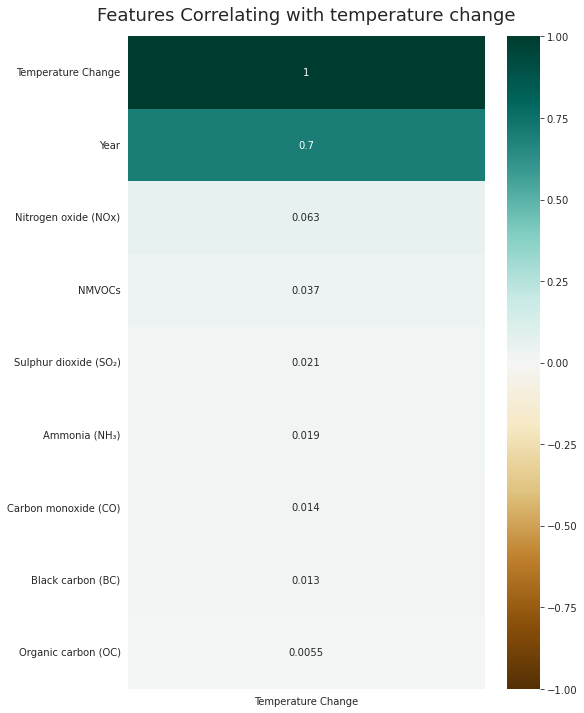

In [40]:
plt.figure(figsize=(8, 12))
new_df_cols = new_df[['Nitrogen oxide (NOx)', 'Sulphur dioxide (SO₂)', 'Carbon monoxide (CO)','Organic carbon (OC)', 'NMVOCs', 'Black carbon (BC)', 'Ammonia (NH₃)', 'Year', 'Temperature Change', 'Entity']]
heatmap = sn.heatmap(new_df_cols.corr()[['Temperature Change']].sort_values(by='Temperature Change', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with temperature change', fontdict={'fontsize':18}, pad=16);


Let's try this correlation analysis with data that comes from a specific country. 

We will use Germany as a example.

<AxesSubplot:title={'center':'Emissions in the USA'}, xlabel='Year'>

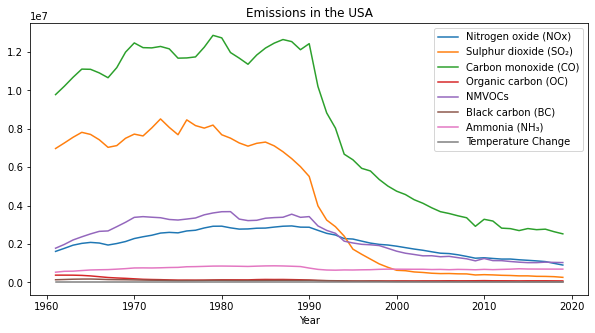

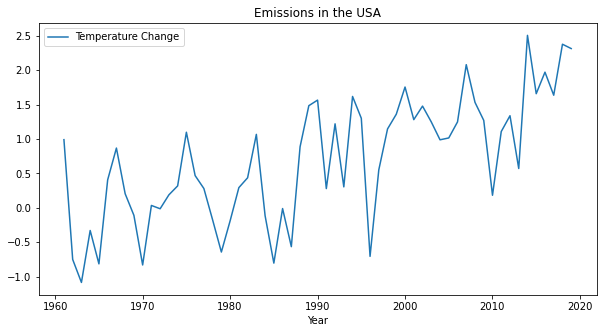

In [26]:

new_df_cols[new_df_cols['Entity']=='Germany'].plot(x='Year', figsize=(10, 5), title='Emissions in the USA')
new_df_cols[new_df_cols['Entity']=='Germany'].plot(x='Year', y="Temperature Change", figsize=(10, 5), title='Emissions in the USA')

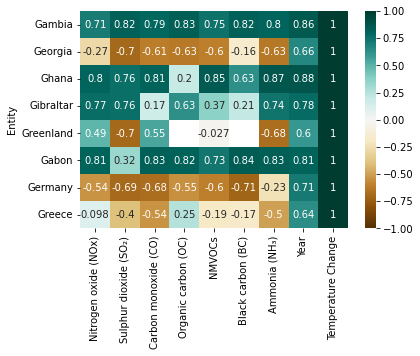

In [27]:
# create a correlation heatmap for the individual countries
corrs_per_country = new_df_cols.groupby(['Entity']).corrwith(new_df_cols['Temperature Change'])
heatmap = sn.heatmap(corrs_per_country.iloc[65:73].sort_values(by='Temperature Change', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [28]:
# define final dataframe for data modelling

df_prepared = new_df[['Nitrogen oxide (NOx)', 'Sulphur dioxide (SO₂)', 'Carbon monoxide (CO)','Organic carbon (OC)', 'NMVOCs', 'Black carbon (BC)', 'Ammonia (NH₃)', 'Year', 'Entity' 'Temperature Change']]

In [44]:
# prepare a model (58 Years of data per country) and leave out 2019 for later evaluation
df_regression_germany = df_prepared[(df_prepared['Entity']=='Germany') & (df_prepared['Year']<2019)].sort_values(['Entity', 'Year'])
df_regression_all = df_prepared[(df_prepared['Year']<2019)].sort_values(['Entity', 'Year'])

df_evaluation_germany = df_prepared[(df_prepared['Entity']=='Germany') & (df_prepared['Year']>=2019)].sort_values(['Entity', 'Year'])
df_evaluation_all = df_prepared[(df_prepared['Year']>=2019)].sort_values(['Entity', 'Year'])


For the regression a simple RandomForestRegressor from the sklearn lib was used.

"A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting."

<cite>https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html</cite>

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

scaler = MinMaxScaler()

df_regression_x = df_regression_germany[['Nitrogen oxide (NOx)', 'Sulphur dioxide (SO₂)', 'Carbon monoxide (CO)','Organic carbon (OC)', 'NMVOCs', 'Black carbon (BC)', 'Ammonia (NH₃)', 'Year']]
df_regression_y = df_regression_germany[['Temperature Change']]
X_train, X_test, y_train, y_test = train_test_split(df_regression_x, df_regression_y, test_size=0.2, random_state=42, shuffle=True)

# later used for evaluation
X_test_original = X_test.copy()

# min max scale data between 0 and 1
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

### 4. Modeling

Use a machine learning random forrest model for regression. Tune Hyperparameters with random cv search. (reaches gradient descent for best values faster)

<cite>Deep Learning - Bengio, Goodfellow, Courville</cite>

In [31]:
# random search for RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 4, stop = 50, num = 4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 4, 8]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 3, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

best_params = rf_random.best_params_
print(best_params)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/home/ldcgrj0/anaconda3/envs/ppyds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/ldcgrj0/anaconda3/envs/ppyds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/ldcgrj0/anaconda3/envs/ppyds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/ldcgrj0/anaconda3/envs/ppyds/lib/python3.9/site-packages/sklearn

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqr

/home/ldcgrj0/anaconda3/envs/ppyds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/ldcgrj0/anaconda3/envs/ppyds/lib/python3.9/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



{'n_estimators': 34, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}


/tmp/ipykernel_5654/1254152183.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



<AxesSubplot:title={'center':'Feature importance'}>

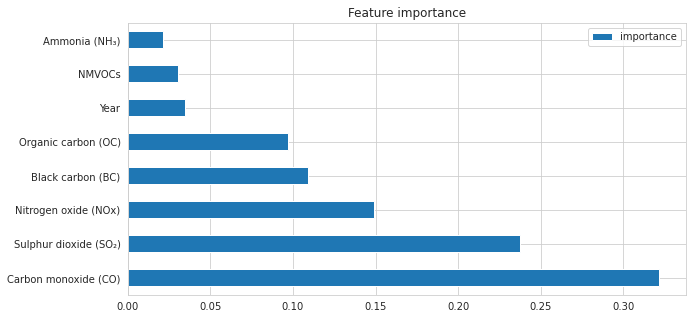

In [47]:
# RandomForrestRegressor
print(best_params)
#regressor = RandomForestRegressor(n_estimators=best_params['n_estimators'], min_samples_split=best_params['min_samples_split'], min_samples_leaf=best_params['min_samples_leaf'], max_features=best_params['max_features'], max_depth=best_params['max_depth'], bootstrap=best_params['bootstrap'])

# actual model that will be using for the evaluation
regressor = RandomForestRegressor(n_estimators=4, min_samples_split=2, min_samples_leaf=4, max_features="sqrt", max_depth=10, bootstrap=False)

regressor.fit(X_train, y_train)

feature_importances = pd.DataFrame(regressor.feature_importances_,
                                      index = df_regression_x.columns,
                                        columns=['importance']).sort_values('importance', ascending=False)
feature_importances.plot(kind='barh', figsize=(10, 5), title='Feature importance')

### 5. Evaluation

Mean Squared Error: 0.25358342764950015


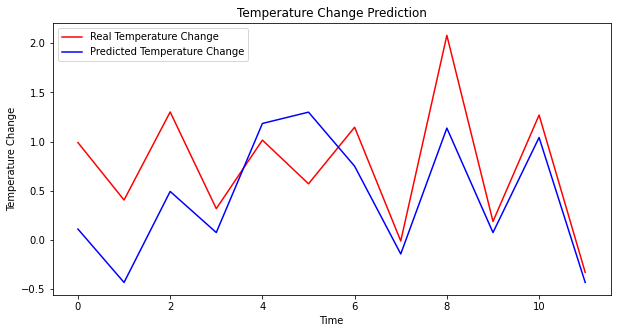

      Year  Temperature Change  Temperature Change Prediction
3730  1961               0.990                       0.110580
3735  1966               0.406                      -0.432045
3764  1995               1.301                       0.493042
3743  1974               0.318                       0.075400
3774  2005               1.015                       1.184250
3782  2013               0.571                       1.299250
3767  1998               1.146                       0.749729
3755  1986              -0.011                      -0.142437
3776  2007               2.080                       1.137250
3742  1973               0.188                       0.075400
3778  2009               1.270                       1.041750
3733  1964              -0.330                      -0.432045


In [33]:
# predict values
y_pred = regressor.predict(X_test)

# rescale results and reshape to 2d array
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
X_test_rescaled = scaler.inverse_transform(X_test.reshape(-1, 1))

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))


# plot results
plt.figure(figsize=(10, 5))
plt.plot(y_test_rescaled, color = 'red', label = 'Real Temperature Change')
plt.plot(y_pred, color = 'blue', label = 'Predicted Temperature Change')
plt.title('Temperature Change Prediction')
plt.xlabel('Time')
plt.ylabel('Temperature Change')
plt.legend()
plt.show()

# add Temperature Change Prediction to X_test_original
X_test_original['Temperature Change Prediction'] = y_pred
X_test_original['Temperature Change'] = y_test_rescaled

print(X_test_original[['Year', 'Temperature Change', 'Temperature Change Prediction']])



In [48]:
def model_by_country(df):
    df_regression_x = df[['Nitrogen oxide (NOx)', 'Sulphur dioxide (SO₂)', 'Carbon monoxide (CO)','Organic carbon (OC)', 'NMVOCs', 'Black carbon (BC)', 'Ammonia (NH₃)', 'Year']]
    df_regression_y = df[['Temperature Change']]
    X_train, X_test, y_train, y_test = train_test_split(df_regression_x, df_regression_y, test_size=0.2, random_state=42, shuffle=True)
    
    regressor = RandomForestRegressor(n_estimators=4, min_samples_split=2, min_samples_leaf=4, max_features="sqrt", max_depth=10, bootstrap=False)
    return regressor.fit(X_train, y_train)
    

model = df_prepared.sort_values(['Entity', 'Year']).groupby(['Entity']).apply(model_by_country)
model = model.reset_index()
model = model.rename(columns={0: 'Temperature Change Model'})


/tmp/ipykernel_5654/1333496963.py:7: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/tmp/ipykernel_5654/1333496963.py:7: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/tmp/ipykernel_5654/1333496963.py:7: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/tmp/ipykernel_5654/1333496963.py:7: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/tmp/ipykernel_5654/1333496963.py:7: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/tmp/ipykernel_5654/1333496963

Error across all countries: 0.15515606303628465


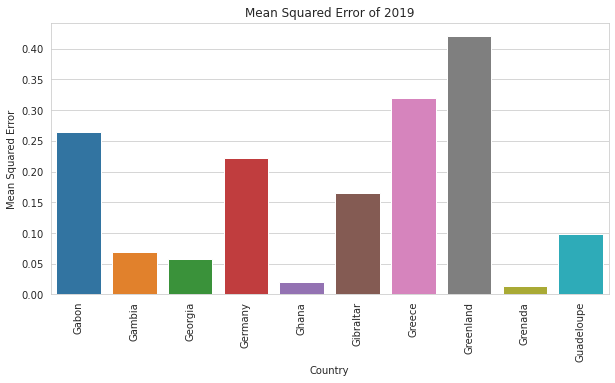

In [53]:
results_2019 = []

for index, row in df_evaluation_all.iterrows():
    row_x = [row['Nitrogen oxide (NOx)'], row['Sulphur dioxide (SO₂)'], row['Carbon monoxide (CO)'], row['Organic carbon (OC)'], row['NMVOCs'], row['Black carbon (BC)'], row['Ammonia (NH₃)'], row['Year']]
    row_y = row['Temperature Change']
    model_country = model[(model['Entity']==row['Entity'])]
    prediction = model_country.iloc[0]["Temperature Change Model"].predict([row_x])
    difference = np.abs(prediction - row_y)
    error = difference / prediction
    mean_squared_error = np.mean(error)
    results_2019.append([row['Entity'], row['Year'], prediction[0], row_y, mean_squared_error])


# results_2019 to dataframe
df_results_2019 = pd.DataFrame(results_2019, columns=['Entity', 'Year', 'Prediction', 'Real', 'Mean Squared Error'])

# df_results_2019 avg for Mean Squared Error
print("Error across all countries:",df_results_2019['Mean Squared Error'].mean())

# plot results of 2019 seaborn
plt.figure(figsize=(10, 5))
sn.set_style("whitegrid")
sn.barplot(x="Entity", y="Mean Squared Error", data=df_results_2019[65:75])
plt.xticks(rotation=90)
plt.title('Mean Squared Error of 2019')
plt.xlabel('Country')
plt.ylabel('Mean Squared Error')
plt.show()


### 6. Deployment